In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [62]:
!pip install nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# TRIAL

In [3]:
sentences = ["Naman is smart, boring, and creative.",  # base example
             "Naman is smart, boring, and creative!!!!!!",  # using punctuations
             "Naman is SMART, boring, and CREATIVE.",  # using CAPS
             "Naman is smart, boring, and super creative.",  # using degree modifiers (example 1)
             "Naman is smart, slightly boring, and creative.",  # using degree modifiers (example 2)
             "Naman is smart, boring, and creative but procrastinates a lot.",  # Polarity shift due to Conjunctions
             "Naman is not not nice.",  # Catching Polarity Negation
             ]

comments = ["  - base example",
           "  - using punctuations",
           "  - using CAPS",
           "  - using degree modifiers (example 1)",
           "  - using degree modifiers (example 2)",
           "  - Polarity shift due to Conjunctions",
           "  - Catching Polarity Negation"]

for i in range(len(sentences)):
    vs = analyzer.polarity_scores(sentences[i])
    vs=analyzer.polarity_scores(sentences[i])
    print("{:-<65} {:-<65} {}".format(sentences[i], comments[i],  str(vs)))


Naman is smart, boring, and creative.----------------------------   - base example------------------------------------------------- {'neg': 0.211, 'neu': 0.275, 'pos': 0.514, 'compound': 0.5106}
Naman is smart, boring, and creative!!!!!!-----------------------   - using punctuations------------------------------------------- {'neg': 0.226, 'neu': 0.393, 'pos': 0.38, 'compound': 0.3753}
Naman is SMART, boring, and CREATIVE.----------------------------   - using CAPS--------------------------------------------------- {'neg': 0.186, 'neu': 0.243, 'pos': 0.571, 'compound': 0.6971}
Naman is smart, boring, and super creative.----------------------   - using degree modifiers (example 1)--------------------------- {'neg': 0.155, 'neu': 0.203, 'pos': 0.642, 'compound': 0.802}
Naman is smart, slightly boring, and creative.-------------------   - using degree modifiers (example 2)--------------------------- {'neg': 0.177, 'neu': 0.353, 'pos': 0.47, 'compound': 0.5154}
Naman is smart, boring, and 

# TRADING

In [2]:
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

data=yf.download('AAPL',start='2022-02-24')
data.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 38.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 3.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=291653 sha256=11a56d7af65b175f2592e91c92b38366f35eab4f8fff1997398e7fae55a432e6
  Stored in directory: /root/.cache/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-24,152.580002,162.850006,152.000000,162.740005,160.901276,141147500
2022-02-25,163.839996,165.119995,160.869995,164.850006,162.987427,91974200
2022-02-28,163.059998,165.419998,162.429993,165.119995,163.254364,95056600
2022-03-01,164.699997,166.600006,161.970001,163.199997,161.356064,83474400
2022-03-02,164.389999,167.360001,162.949997,166.559998,164.678101,79724800


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-13,172.770004,173.190002,170.759995,171.130005,171.130005,52488700
2024-03-14,172.910004,174.309998,172.050003,173.000000,173.000000,72913500
2024-03-15,171.169998,172.619995,170.289993,172.619995,172.619995,121664700
2024-03-18,175.570007,177.710007,173.520004,173.720001,173.720001,75604200
2024-03-19,174.339996,176.610001,173.029999,176.080002,176.080002,55130000


# SIMPLE MOVING AVERAGE

In [63]:
data['20_SMA']=data['Close'].rolling(window=20,min_periods=1).mean()
data['50_SMA']=data['Close'].rolling(window=50,min_periods=1).mean()
data.head()

,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA
Date,,,,,,,,
2022-02-24,152.580002,162.850006,152.000000,162.740005,160.901276,141147500,162.740005,162.740005
2022-02-25,163.839996,165.119995,160.869995,164.850006,162.987427,91974200,163.795006,163.795006
2022-02-28,163.059998,165.419998,162.429993,165.119995,163.254364,95056600,164.236669,164.236669
2022-03-01,164.699997,166.600006,161.970001,163.199997,161.356064,83474400,163.977501,163.977501
2022-03-02,164.389999,167.360001,162.949997,166.559998,164.678101,79724800,164.494000,164.494000


In [64]:
data['Signal'] = 0.0
data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1.0, 0.0)
data['position']=data['Signal'].diff()
data.head()

,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA,Signal,position
Date,,,,,,,,,,
2022-02-24,152.580002,162.850006,152.000000,162.740005,160.901276,141147500,162.740005,162.740005,0.0,NaN
2022-02-25,163.839996,165.119995,160.869995,164.850006,162.987427,91974200,163.795006,163.795006,0.0,0.0
2022-02-28,163.059998,165.419998,162.429993,165.119995,163.254364,95056600,164.236669,164.236669,0.0,0.0
2022-03-01,164.699997,166.600006,161.970001,163.199997,161.356064,83474400,163.977501,163.977501,0.0,0.0
2022-03-02,164.389999,167.360001,162.949997,166.559998,164.678101,79724800,164.494000,164.494000,0.0,0.0


In [65]:
Trade_Buy=[]
Trade_Sell=[]
for i in range(len(data)-1):
    if ((data['20_SMA'].values[i] > data['50_SMA'].values[i])):
        Trade_Buy.append(i)
    else:
        Trade_Sell.append(i)

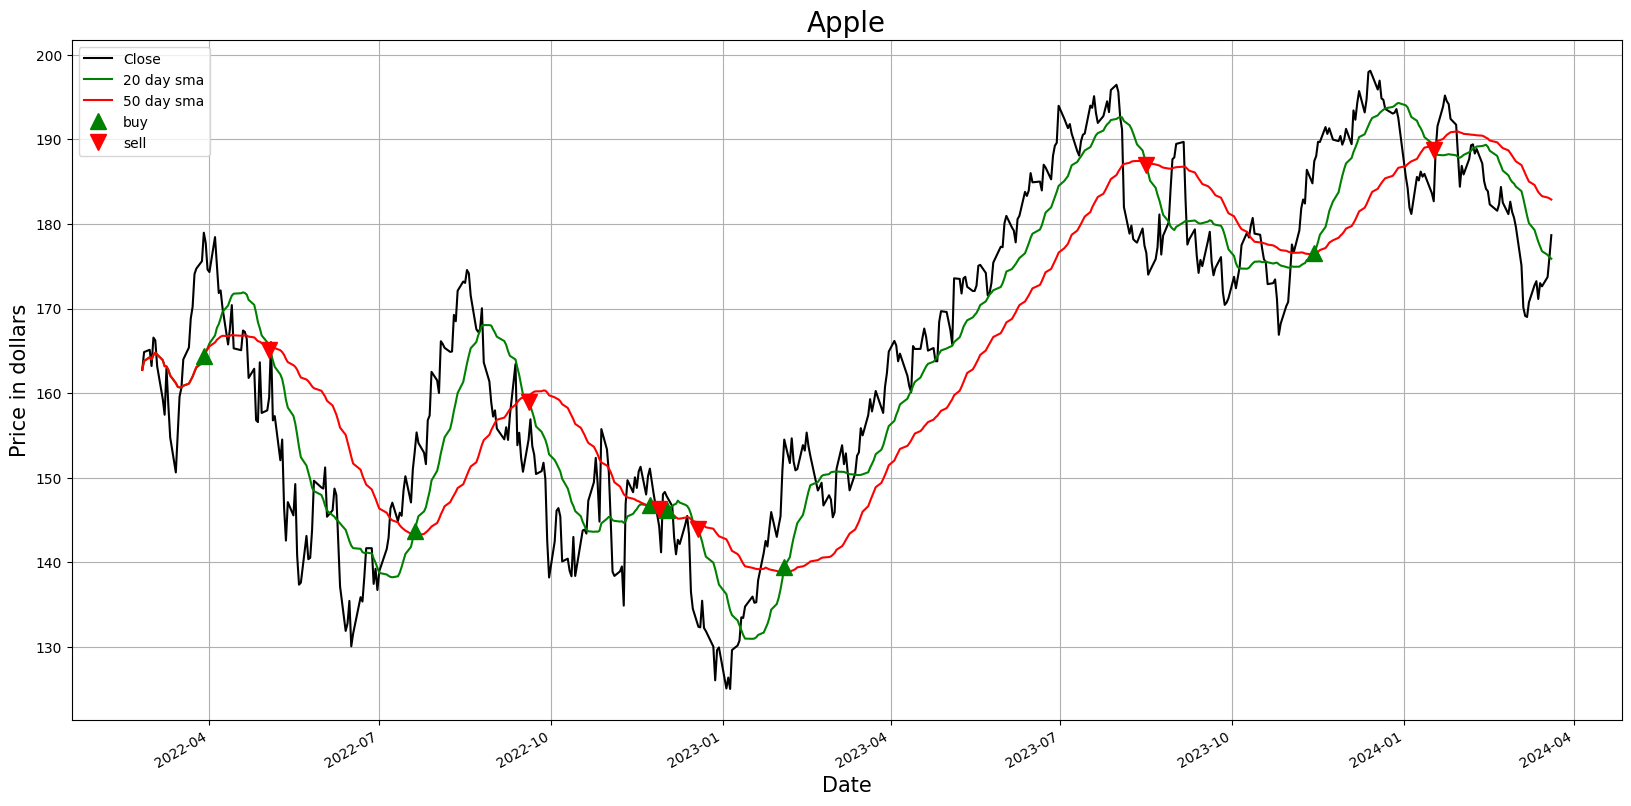

In [66]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
data['Close'].plot(color = 'k', label= 'Close') 
data['20_SMA'].plot(color='g',label='20 day sma')
data['50_SMA'].plot(color='r',label='50 day sma')
# # plot ‘buy’ signals
plt.plot(data[data['position'] == 1].index, 
          data['20_SMA'][data['position'] == 1], 
         '^', markersize = 12, color = 'g', label = 'buy')
plt.plot(data[data['position'] == -1].index, 
          data['20_SMA'][data['position'] == -1], 
         'v', markersize = 12, color = 'r', label = 'sell')
plt.ylabel('Price in dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Apple', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [67]:
import requests 
secret=''


In [68]:
!pip install eventregistry

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eventregistry: filename=eventregistry-9.1-py3-none-any.whl size=67625 sha256=35856775cc5fc52b91092eaf661dd21d54844b43f329c0591ca853f5a4ce9839
  Stored in directory: /root/.cache/pip/wheels/43/b1/a3/96973dbeb71bb960bd053bfc7113194a3c35859407e20c907f
Successfully built eventregistry


In [69]:
from eventregistry import *

In [70]:
er = EventRegistry(apiKey = secret)
query = {
  "$query": {
    "$and": [
      {
        "$or": [
          {
            "conceptUri": "http://en.wikipedia.org/wiki/Apple_Inc."
          },
          {
            "conceptUri": "http://en.wikipedia.org/wiki/Apple_Inc."
          }
        ]
      },
      {
        "sourceUri": "finance.yahoo.com"
      },
      {
        "lang": "eng"
      }
    ]
  },
  "$filter": {
    "forceMaxDataTimeWindow": "31"
  }
}


In [71]:
q = QueryArticlesIter.initWithComplexQuery(query)

articles_list = []

# change maxItems to get the number of results that you want
for article in q.execQuery(er, maxItems=100):
    articles_list.append(article)

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(articles_list)

In [72]:
df.head()

,uri,lang,isDuplicate,date,time,dateTime,dateTimePub,dataType,sim,url,title,body,source,authors,image,eventUri,sentiment,wgt,relevance
0,8039650071,eng,True,2024-03-21,06:03:27,2024-03-21T06:03:27Z,2024-03-21T06:01:28Z,news,0.549020,https://finance.yahoo.com/video/us-sue-apple-o...,US to sue Apple over antitrust violations: report,STORY: Apple is set to be sued by the U.S. Dep...,"{'uri': 'finance.yahoo.com', 'dataType': 'news...",[],https://media.zenfs.com/en/video.reutersnews.c...,None,-0.145098,201,201
1,2024-03-296326575,eng,True,2024-03-20,23:44:18,2024-03-20T23:44:18Z,2024-03-20T22:07:21Z,news,0.000000,https://finance.yahoo.com/news/meta-microsoft-...,"Meta, Microsoft, X and Match Group challenge A...",Apple is flouting a court order intended to re...,"{'uri': 'finance.yahoo.com', 'dataType': 'news...",[],https://media.zenfs.com/en/cnn_business_articl...,None,0.286275,201,201
2,8039292741,eng,False,2024-03-20,23:26:18,2024-03-20T23:26:18Z,2024-03-20T23:25:20Z,news,0.000000,https://finance.yahoo.com/news/apple-aapl-surp...,Apple (AAPL) Surpasses Market Returns: Some Fa...,The most recent trading session ended with App...,"{'uri': 'finance.yahoo.com', 'dataType': 'news...",[],https://media.zenfs.com/en/zacks.com/0c6f98f4b...,None,0.325490,201,201
3,2024-03-296270836,eng,False,2024-03-20,22:07:42,2024-03-20T22:07:42Z,2024-03-20T22:02:13Z,news,0.000000,https://finance.yahoo.com/news/8-best-airtag-a...,8 Best AirTag Alternatives That Are Actually W...,"In this article, we will list the 8 best AirTa...","{'uri': 'finance.yahoo.com', 'dataType': 'news...","[{'uri': 'daniyal_jawaid@finance.yahoo.com', '...",https://s.yimg.com/ny/api/res/1.2/J5uiIGd8_s19...,None,0.631373,201,201
4,2024-03-296268392,eng,False,2024-03-20,22:04:32,2024-03-20T22:04:32Z,2024-03-20T21:56:59Z,news,0.513726,https://finance.yahoo.com/news/20-best-chatgpt...,20 Best ChatGPT Alternatives for 2024: Free & ...,"In this article, we will list the 20 best Chat...","{'uri': 'finance.yahoo.com', 'dataType': 'news...","[{'uri': 'daniyal_jawaid@finance.yahoo.com', '...",https://s.yimg.com/ny/api/res/1.2/uhaEWqILUdrM...,eng-9406113,0.427451,201,201


In [73]:
news_df = pd.concat([df[['body','title','dateTime','sentiment']].apply(pd.Series)], axis=1)
news_df['dateTime']=pd.to_datetime(news_df['dateTime'])
news_df.sort_values(by='dateTime')
news_df.head()

,body,title,dateTime,sentiment
0,STORY: Apple is set to be sued by the U.S. Dep...,US to sue Apple over antitrust violations: report,2024-03-21 06:03:27+00:00,-0.145098
1,Apple is flouting a court order intended to re...,"Meta, Microsoft, X and Match Group challenge A...",2024-03-20 23:44:18+00:00,0.286275
2,The most recent trading session ended with App...,Apple (AAPL) Surpasses Market Returns: Some Fa...,2024-03-20 23:26:18+00:00,0.325490
3,"In this article, we will list the 8 best AirTa...",8 Best AirTag Alternatives That Are Actually W...,2024-03-20 22:07:42+00:00,0.631373
4,"In this article, we will list the 20 best Chat...",20 Best ChatGPT Alternatives for 2024: Free & ...,2024-03-20 22:04:32+00:00,0.427451


In [74]:
from pandas.tseries.offsets import BDay

# to get the business day for which particular news headline should be used to make trade calls
def get_trade_open(date):
    curr_date_open = pd.to_datetime(date).floor('d').replace(hour=13,minute=30) - BDay(0)
    curr_date_close = pd.to_datetime(date).floor('d').replace(hour=20,minute=0) - BDay(0)
    
    prev_date_close = (curr_date_open - BDay()).replace(hour=20,minute=0)
    next_date_open = (curr_date_close + BDay()).replace(hour=13,minute=30)
    
    if ((pd.to_datetime(date)>=prev_date_close) & (pd.to_datetime(date)<curr_date_open)):
        return curr_date_open
    elif ((pd.to_datetime(date)>=curr_date_close) & (pd.to_datetime(date)<next_date_open)):
        return next_date_open
    else:
        return None

In [75]:
news_df["trading_time"] = news_df["dateTime"].apply(get_trade_open)

news_df = news_df[pd.notnull(news_df['trading_time'])]
news_df['Date'] = pd.to_datetime(pd.to_datetime(news_df['trading_time']).dt.date)

In [76]:
news_df

,body,title,dateTime,sentiment,trading_time,Date
0,STORY: Apple is set to be sued by the U.S. Dep...,US to sue Apple over antitrust violations: report,2024-03-21 06:03:27+00:00,-0.145098,2024-03-21 13:30:00+00:00,2024-03-21
1,Apple is flouting a court order intended to re...,"Meta, Microsoft, X and Match Group challenge A...",2024-03-20 23:44:18+00:00,0.286275,2024-03-21 13:30:00+00:00,2024-03-21
2,The most recent trading session ended with App...,Apple (AAPL) Surpasses Market Returns: Some Fa...,2024-03-20 23:26:18+00:00,0.325490,2024-03-21 13:30:00+00:00,2024-03-21
3,"In this article, we will list the 8 best AirTa...",8 Best AirTag Alternatives That Are Actually W...,2024-03-20 22:07:42+00:00,0.631373,2024-03-21 13:30:00+00:00,2024-03-21
4,"In this article, we will list the 20 best Chat...",20 Best ChatGPT Alternatives for 2024: Free & ...,2024-03-20 22:04:32+00:00,0.427451,2024-03-21 13:30:00+00:00,2024-03-21
...,...,...,...,...,...,...
95,"For years, the Apple car hung over the global ...","The Apple Car Is Dead, but the Idea Won't Die",2024-03-11 06:11:48+00:00,-0.074510,2024-03-11 13:30:00+00:00,2024-03-11
96,(Bloomberg) -- Apple Inc. is preparing to open...,Apple to Open New Shanghai Store as China iPho...,2024-03-11 06:26:09+00:00,0.074510,2024-03-11 13:30:00+00:00,2024-03-11
97,Apple reversed its decision to block Fortnite ...,"Apple reverses course, allows Epic Games to la...",2024-03-11 04:05:59+00:00,-0.317647,2024-03-11 13:30:00+00:00,2024-03-11
98,Apple's (AAPL) MacBook Air is one of the best ...,Apple MacBook Air 2024 review: The best keeps ...,2024-03-10 14:58:43+00:00,0.184314,2024-03-11 13:30:00+00:00,2024-03-11


In [77]:
cs = []
for row in range(len(news_df)):
    cs.append(analyzer.polarity_scores(news_df['title'].iloc[row])['compound'])

news_df['compound_vader_score'] = cs
news_df = news_df[(news_df[['compound_vader_score']] != 0).all(axis=1)].reset_index(drop=True)

news_df.head()

,body,title,dateTime,sentiment,trading_time,Date,compound_vader_score
0,STORY: Apple is set to be sued by the U.S. Dep...,US to sue Apple over antitrust violations: report,2024-03-21 06:03:27+00:00,-0.145098,2024-03-21 13:30:00+00:00,2024-03-21,-0.5267
1,Apple is flouting a court order intended to re...,"Meta, Microsoft, X and Match Group challenge A...",2024-03-20 23:44:18+00:00,0.286275,2024-03-21 13:30:00+00:00,2024-03-21,0.0772
2,The most recent trading session ended with App...,Apple (AAPL) Surpasses Market Returns: Some Fa...,2024-03-20 23:26:18+00:00,0.325490,2024-03-21 13:30:00+00:00,2024-03-21,0.2263
3,"In this article, we will list the 8 best AirTa...",8 Best AirTag Alternatives That Are Actually W...,2024-03-20 22:07:42+00:00,0.631373,2024-03-21 13:30:00+00:00,2024-03-21,0.7269
4,"In this article, we will list the 20 best Chat...",20 Best ChatGPT Alternatives for 2024: Free & ...,2024-03-20 22:04:32+00:00,0.427451,2024-03-21 13:30:00+00:00,2024-03-21,0.8176


In [78]:
news_df.to_csv('news_df.csv')

In [79]:
unique_dates = news_df['Date'].unique()
grouped_dates = news_df.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

max_cs = []
min_cs = []

for key in grouped_dates.groups.keys():
    d = grouped_dates.get_group(key)
    if d["compound_vader_score"].max() > 0:
        max_cs.append(d["compound_vader_score"].max())
    elif d["compound_vader_score"].max() < 0:
        max_cs.append(0)
    
    if d["compound_vader_score"].min() < 0:
        min_cs.append(d["compound_vader_score"].min())
    elif d["compound_vader_score"].min() > 0:
        min_cs.append(0)
    
extreme_scores_dict = {'Date':keys_dates,'max_scores':max_cs,'min_scores':min_cs}
extreme_scores_df = pd.DataFrame(extreme_scores_dict)

In [80]:
extreme_scores_df

,Date,max_scores,min_scores
0,2024-03-11,0.7964,-0.0258
1,2024-03-12,0.5574,0.0000
2,2024-03-13,0.3818,0.0000
3,2024-03-14,0.2500,-0.3274
4,2024-03-15,0.7783,0.0000
5,2024-03-18,0.8211,-0.4404
6,2024-03-19,0.8271,-0.0772
7,2024-03-20,0.0000,-0.2960
8,2024-03-21,0.8176,-0.5267


In [81]:
extreme_scores_df2=extreme_scores_df.copy()

In [82]:
extreme_scores_df.set_index('Date',inplace=True)
extreme_scores_df

,max_scores,min_scores
Date,,
2024-03-11,0.7964,-0.0258
2024-03-12,0.5574,0.0000
2024-03-13,0.3818,0.0000
2024-03-14,0.2500,-0.3274
2024-03-15,0.7783,0.0000
2024-03-18,0.8211,-0.4404
2024-03-19,0.8271,-0.0772
2024-03-20,0.0000,-0.2960
2024-03-21,0.8176,-0.5267


In [83]:
final_scores = []
for i in range(len(extreme_scores_df)):
    final_scores.append(extreme_scores_df['max_scores'].values[i] + extreme_scores_df['min_scores'].values[i])

extreme_scores_df['final_scores'] = final_scores

extreme_scores_df.head()

,max_scores,min_scores,final_scores
Date,,,
2024-03-11,0.7964,-0.0258,0.7706
2024-03-12,0.5574,0.0000,0.5574
2024-03-13,0.3818,0.0000,0.3818
2024-03-14,0.2500,-0.3274,-0.0774
2024-03-15,0.7783,0.0000,0.7783


In [84]:
# VADER trade calls - with threshold
extreme_scores_df['signal']=np.where(extreme_scores_df['final_scores']>0.40,1.0,0.0)
extreme_scores_df

,max_scores,min_scores,final_scores,signal
Date,,,,
2024-03-11,0.7964,-0.0258,0.7706,1.0
2024-03-12,0.5574,0.0000,0.5574,1.0
2024-03-13,0.3818,0.0000,0.3818,0.0
2024-03-14,0.2500,-0.3274,-0.0774,0.0
2024-03-15,0.7783,0.0000,0.7783,1.0
2024-03-18,0.8211,-0.4404,0.3807,0.0
2024-03-19,0.8271,-0.0772,0.7499,1.0
2024-03-20,0.0000,-0.2960,-0.2960,0.0
2024-03-21,0.8176,-0.5267,0.2909,0.0


In [85]:
extreme_scores_df[extreme_scores_df['signal'] == 1].index
 

DatetimeIndex(['2024-03-11', '2024-03-12', '2024-03-15', '2024-03-19'], dtype='datetime64[ns]', name='Date', freq=None)

In [86]:
extreme_scores_df['final_scores'][extreme_scores_df['signal'] == 1]

Date
2024-03-11    0.7706
2024-03-12    0.5574
2024-03-15    0.7783
2024-03-19    0.7499
Name: final_scores, dtype: float64

In [87]:
final_scores = []
for i in range(len(extreme_scores_df2)):
    final_scores.append(extreme_scores_df2['max_scores'].values[i] + extreme_scores_df2['min_scores'].values[i])

extreme_scores_df2['final_scores'] = final_scores

extreme_scores_df2.head()

,Date,max_scores,min_scores,final_scores
0,2024-03-11,0.7964,-0.0258,0.7706
1,2024-03-12,0.5574,0.0000,0.5574
2,2024-03-13,0.3818,0.0000,0.3818
3,2024-03-14,0.2500,-0.3274,-0.0774
4,2024-03-15,0.7783,0.0000,0.7783


In [88]:
vader_Buy=[]
vader_Sell=[]
for i in range(len(extreme_scores_df2)):
    if extreme_scores_df2['final_scores'].values[i] > 0.40:
        print("Trade Call for {row} is Buy.".format(row=extreme_scores_df2['Date'].iloc[i].date()))
        vader_Buy.append(extreme_scores_df2['Date'].iloc[i].date())
    else:
        print("Trade Call for {row} is Sell.".format(row=extreme_scores_df2['Date'].iloc[i].date()))
        vader_Sell.append(extreme_scores_df2['Date'].iloc[i].date())

Trade Call for 2024-03-11 is Buy.
Trade Call for 2024-03-12 is Buy.
Trade Call for 2024-03-13 is Sell.
Trade Call for 2024-03-14 is Sell.
Trade Call for 2024-03-15 is Buy.
Trade Call for 2024-03-18 is Sell.
Trade Call for 2024-03-19 is Buy.
Trade Call for 2024-03-20 is Sell.
Trade Call for 2024-03-21 is Sell.


In [89]:
vader_buy = []
for i in range(len(data)):
    if data.index[i].date() in vader_Buy:
        vader_buy.append(i)
        
vader_sell = []
for i in range(len(data)):
    if data.index[i].date() in vader_Sell:
        vader_sell.append(i)

In [90]:
data.index

DatetimeIndex(['2022-02-24', '2022-02-25', '2022-02-28', '2022-03-01',
               '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-07',
               '2022-03-08', '2022-03-09',
               ...
               '2024-03-07', '2024-03-08', '2024-03-11', '2024-03-12',
               '2024-03-13', '2024-03-14', '2024-03-15', '2024-03-18',
               '2024-03-19', '2024-03-20'],
              dtype='datetime64[ns]', name='Date', length=520, freq=None)

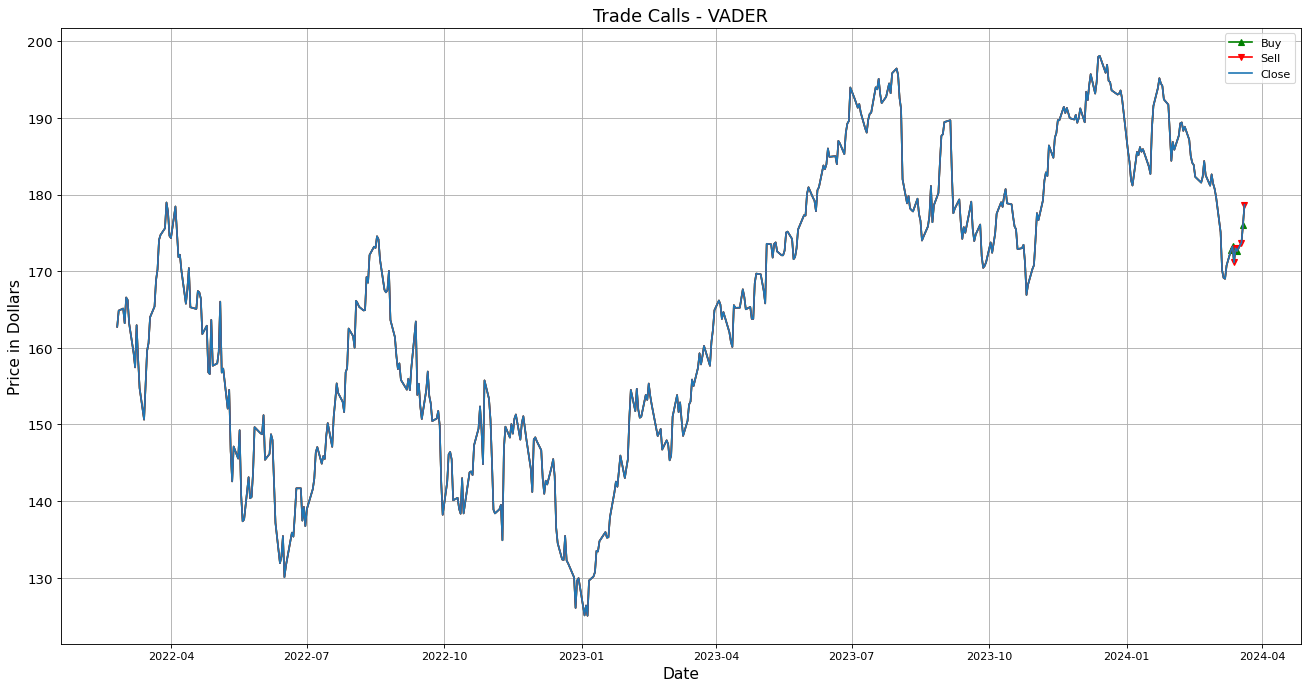

In [91]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data.index, data['Close'],'-^', markevery=vader_buy, ms=5, color='green')
plt.plot(data.index, data['Close'],'-v', markevery=vader_sell, ms=5, color='red')
plt.plot(data.index, data['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.yticks(fontsize=12)
plt.title('Trade Calls - VADER', fontsize = 16)
plt.legend(['Buy','Sell','Close'])
plt.grid()
plt.show() 

In [92]:
vader_buy = []
for i in range(len(data[-50:])):
    if data[-50:].index[i].date() in vader_Buy:
        vader_buy.append(i)
        
vader_sell = []
for i in range(len(data[-50:])):
    if data[-50:].index[i].date() in vader_Sell:
        vader_sell.append(i)


In [93]:
data_c=data.copy()
data_c['5_SMA']=data_c['Close'].rolling(window=5,min_periods=1).mean()
data_c['2_SMA']=data_c['Close'].rolling(window=2,min_periods=1).mean()

In [94]:
data_c.head()

,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA,Signal,position,5_SMA,2_SMA
Date,,,,,,,,,,,,
2022-02-24,152.580002,162.850006,152.000000,162.740005,160.901276,141147500,162.740005,162.740005,0.0,NaN,162.740005,162.740005
2022-02-25,163.839996,165.119995,160.869995,164.850006,162.987427,91974200,163.795006,163.795006,0.0,0.0,163.795006,163.795006
2022-02-28,163.059998,165.419998,162.429993,165.119995,163.254364,95056600,164.236669,164.236669,0.0,0.0,164.236669,164.985001
2022-03-01,164.699997,166.600006,161.970001,163.199997,161.356064,83474400,163.977501,163.977501,0.0,0.0,163.977501,164.159996
2022-03-02,164.389999,167.360001,162.949997,166.559998,164.678101,79724800,164.494000,164.494000,0.0,0.0,164.494000,164.879997


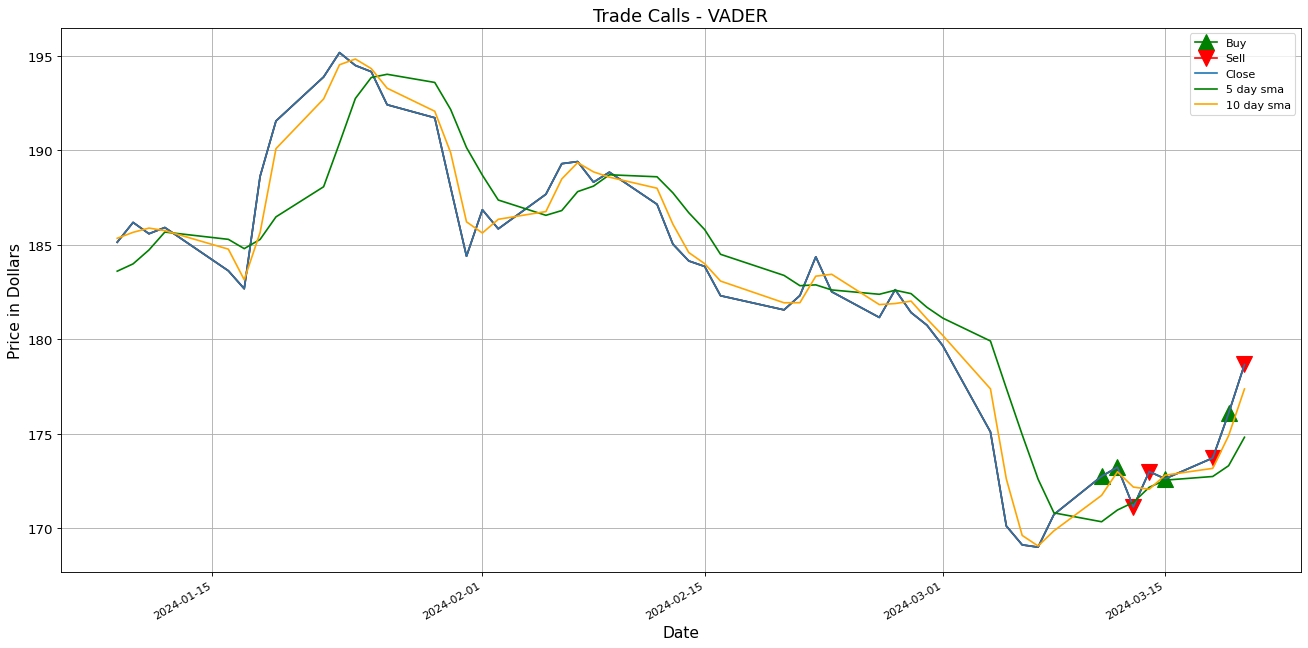

In [95]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data[-50:].index, data[-50:]['Close'],'-^', markevery=vader_buy, ms=15, color='green')
plt.plot(data[-50:].index, data[-50:]['Close'],'-v', markevery=vader_sell,  ms=15, color='red')
plt.plot(data.index[-50:], data[-50:]['Close'])
data_c[-50:]['5_SMA'].plot(color='g',label='5 day sma')
data_c[-50:]['2_SMA'].plot(color='orange',label='10 day sma')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.yticks(fontsize=12)
plt.title('Trade Calls - VADER', fontsize = 16)
plt.legend(['Buy','Sell','Close','5 day sma','10 day sma'])
plt.grid()
plt.show() 

# XGBREGRESSOR

In [1]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 54.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.0
    Uninstalling pandas-2.2.0:
      Successfully uninstalled pandas-2.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.1.2 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, 

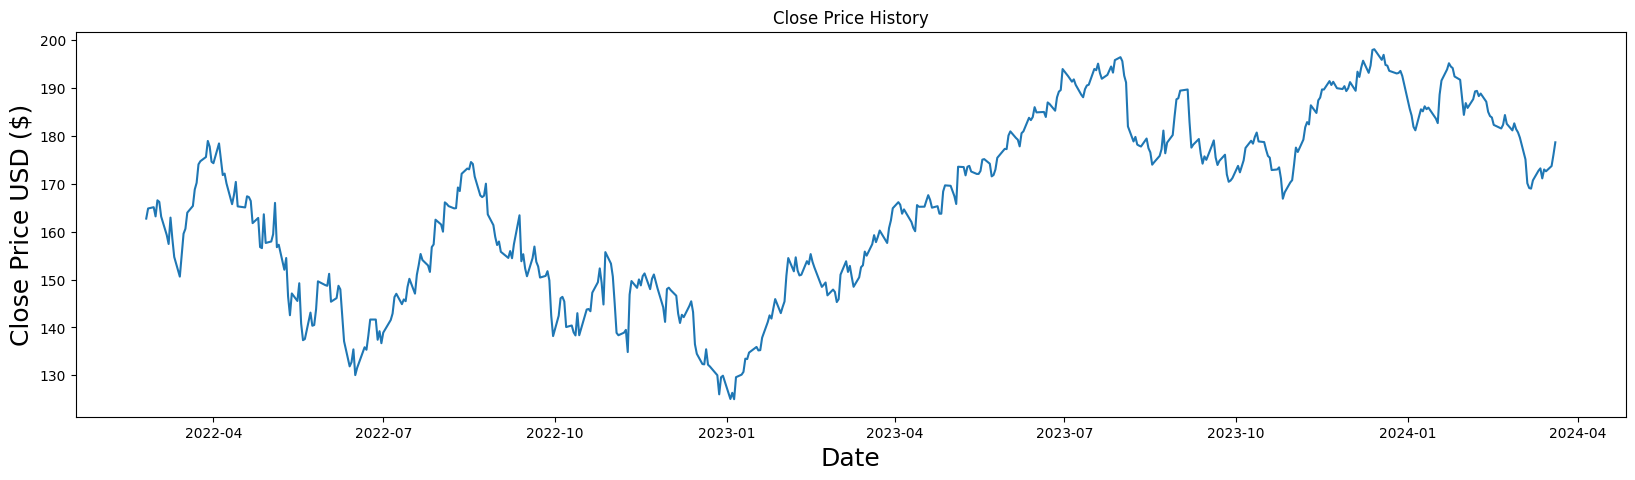

In [56]:
plt.figure(figsize=(20,5))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [5]:
dataset=data[['High','Low','Close','Adj Close','Volume','Open']]
dataset.head()

,High,Low,Close,Adj Close,Volume,Open
Date,,,,,,
2022-02-24,162.850006,152.000000,162.740005,160.901276,141147500,152.580002
2022-02-25,165.119995,160.869995,164.850006,162.987427,91974200,163.839996
2022-02-28,165.419998,162.429993,165.119995,163.254364,95056600,163.059998
2022-03-01,166.600006,161.970001,163.199997,161.356064,83474400,164.699997
2022-03-02,167.360001,162.949997,166.559998,164.678101,79724800,164.389999


In [7]:
d=dataset.copy()
d=d.reset_index()

In [8]:
training_mask = d["Date"] < "2023-09-30"
training_data = d.loc[training_mask]
print(training_data.shape)

testing_mask = d["Date"] >= "2023-09-30"
testing_data = d.loc[testing_mask]
print(testing_data.shape)

(402, 7)
(118, 7)


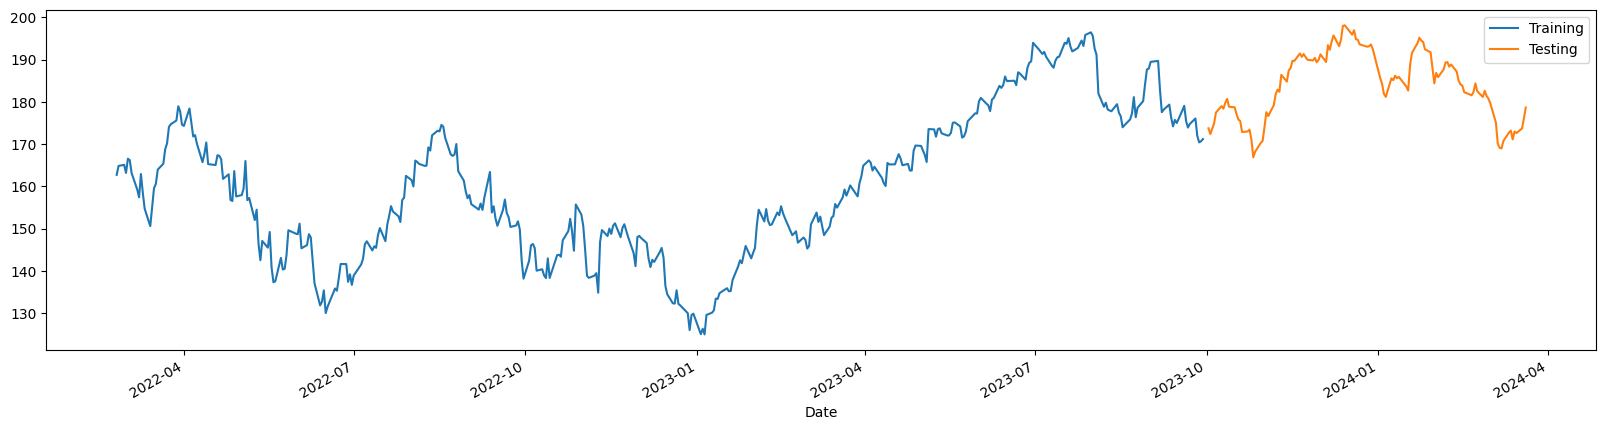

In [17]:
figure, ax = plt.subplots(figsize=(20, 5))
training_data.plot(ax=ax, label="Training", x="Date", y="Close")
testing_data.plot(ax=ax, label="Testing", x="Date", y="Close")
plt.show()

In [18]:
training_dates=training_data['Date']
training_data = training_data.drop(columns=["Date"])
testing_dates = testing_data["Date"]
testing_data = testing_data.drop(columns=["Date"])

X_train = training_data[['High','Low','Open','Adj Close','Volume']]
y_train = training_data["Close"]

X_test = testing_data[['High','Low','Open','Adj Close','Volume']]
y_test = testing_data["Close"]

In [60]:
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [3,5, 10],
    "learning_rate": [0.01, 0.05,],
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=100),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, impo...
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05],
                         'max_depth': [3, 5, 10]})

In [20]:

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")

def plot_predictions(testing_dates, y_test, prediction):
  df_train = pd.DataFrame({"date": training_dates, "actual": y_train})
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_train.plot(ax=ax,label='Train',x='date',y='actual')
  df_test.plot(ax=ax, label="Actual Test", x="date", y="actual")
  df_test.plot(ax=ax, label="Forecast", x="date", y="prediction")
  plt.legend(['Train',"Actual Test", "Forecast"])
  plt.show()

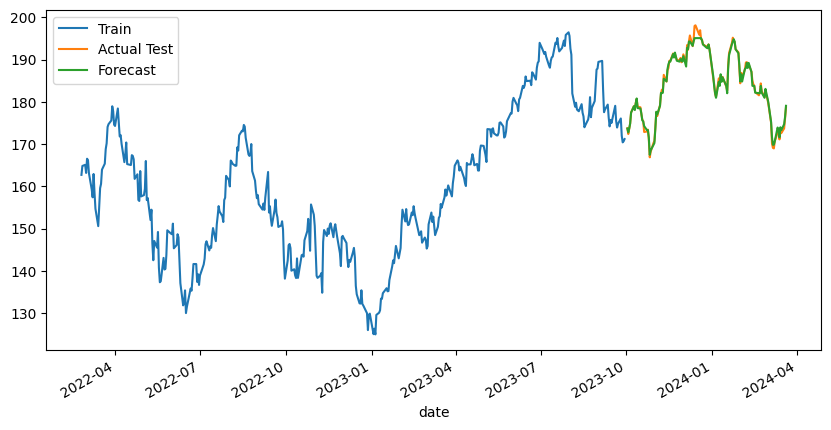

MAE: 0.48989337985798465
MSE: 0.518941379497538
MAPE: 0.002647719315988494


In [61]:
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

# LIGHTGBM

In [22]:
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = lgb.LGBMRegressor()
parameters = {
    "max_depth": [3, 5, 10],
    "num_leaves": [10, 40],

}

grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 163.795006
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGB

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=100),
             estimator=LGBMRegressor(),
             param_grid={'max_depth': [3, 5, 10], 'num_leaves': [10, 40]})

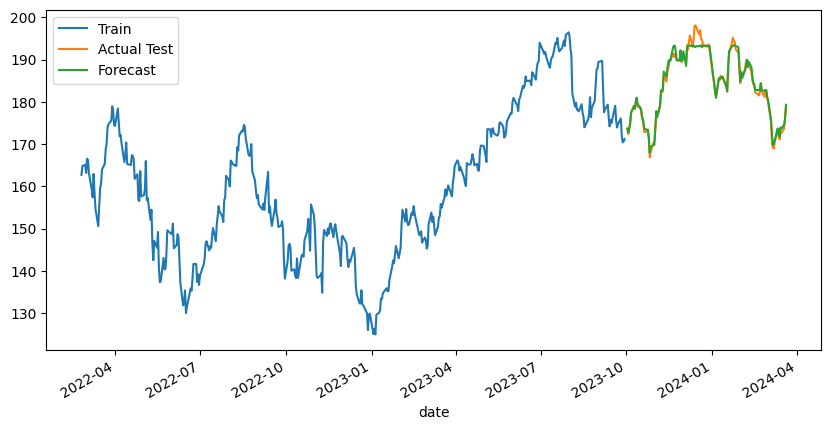

MAE: 0.7856836935986032
MSE: 1.4406247414504598
MAPE: 0.00419946343993209


In [23]:
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

# COMBINED

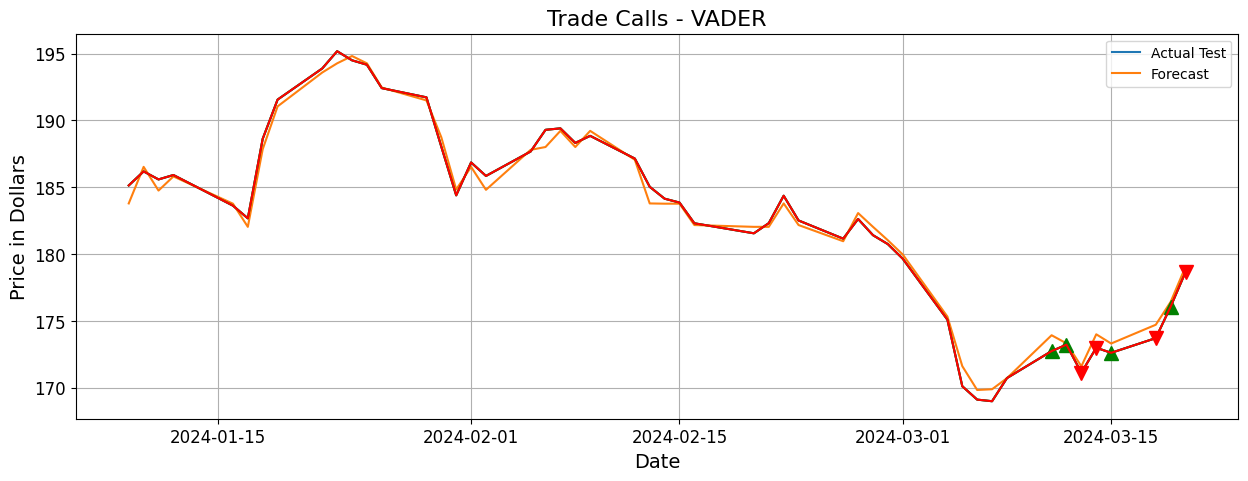

In [154]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data, vader_buy, and vader_sell are defined

plt.figure(figsize=(15,5))



# Plotting Train, Actual Test, and Forecast lines
df_train = pd.DataFrame({"date": training_dates, "actual": y_train})
df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })

# plt.plot(df_train['date'], df_train['actual'], label='Train',color='black')
plt.plot(df_test[-50:]['date'], df_test[-50:]['actual'], label="Actual Test")
plt.plot(df_test[-50:]['date'], df_test[-50:]['prediction'], label="Forecast")
# data_c[-50:]['5_SMA'].plot(color='g',label='5 day sma')
# data_c[-50:]['2_SMA'].plot(color='orange',label='10 day sma')

# Plotting Buy and Sell markers on the Close price
plt.plot(data[-50:].index, data[-50:]['Close'], '-^', markevery=vader_buy, ms=10, color='g')
plt.plot(data[-50:].index, data[-50:]['Close'], '-v', markevery=vader_sell, ms=10, color='r')

# Adding labels, title, legend, and grid
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price in Dollars', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - VADER', fontsize=16)
plt.legend()
plt.grid()

plt.show()
